# Assignment 2 - Data Visualization and Manipulation

This assignment will focus on two very important libaries in machinese learning and data science: Matplotlib and Pandas. You will learn several data manipulation and visualization techniques. However, there exists a lot more functions out there. Don't forget to get curious and explore what these powerful libraries are capable of!

*Don't forget that commenting your code is very important!*

### 1. Import packages

###### Importing packages and knowing what packages you need for a project is crucial. We will not be reminding you which packages you need for each question and for the assignment in general. Please import the packages at your own discretion. Although it is common practice to import all packages at once at the beginning, don't hesitate to revisit the next cell, and import more packages as you may need. 

*Note*: we presented some example packages during class (eg. numpy, matplotlib, etc.). However, we only focus on the end results, so you can use any libraries of you choice. 

In [6]:
# IMPORT PACKAGES
# =========== YOUR CODE HERE ======== 
import pandas as pd 
import matplotlib.pyplot as plt

### 2. Data Manipulation

For this part of the assignment, we will be working with ramen-ratings dataset from Kaggle. <br>
https://www.kaggle.com/residentmario/ramen-ratings 

###### Read the 'dataset/ramen-ratings.csv' dataset. Describe the dataset quickly. What do you see? 

In [7]:
# =========== YOUR CODE HERE ========
df = pd.read_csv('./dataset/ramen-ratings.csv')
print(df.head())

   Review #           Brand  \
0      2580       New Touch   
1      2579        Just Way   
2      2578          Nissin   
3      2577         Wei Lih   
4      2576  Ching's Secret   

                                             Variety Style        Country  \
0                          T's Restaurant Tantanmen    Cup          Japan   
1  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...  Pack          China   
2                      Cup Noodles Chicken Vegetable   Cup  United States   
3                      GGE Ramen Snack Tomato Flavor  Pack          China   
4                                    Singapore Curry  Pack          India   

   Stars Top Ten  
0   3.75     NaN  
1   1.00     NaN  
2   2.25     NaN  
3   2.75     NaN  
4   3.75     NaN  


### <span style="background-color: #F9F2EB">Your dataset description here: ... 

Interesting things to write in this section include: 
- It is a dataset about ramen ratings with 2580 entries. 
- The dataset contains information about the brand, the country of origin, the varities, style, the star ratings and whether it has been part of the world top ten ramen. 
- The 'Review #' columnn is simply an index and has no relevance in the actual dataset. 
- 'Brand', 'Country', 'Variety' and 'Style' have categorical values. Specifically, 'Variety' have unique values. 
- The 'Star' rating is continuous decimal numbers out of 5, the majority (around 50%) of the ratings are above 3.0
- Over 50% of the 'Style' entries are 'Packs'
- The 'Top Ten' entries are NaN (null) if they have never been a Top Ten ramen. This field include the year of the reward, as well as the ranking. 

###### Take a look at the 'Top Ten' column. The row has a NaN value if the ramen has never been ranked. In datascience, NaN values are dangerous and can stop algorithms from working properly or working at all. First replace the NaN values by 'no'. 

In [8]:
# =========== YOUR CODE HERE ========
df['Top Ten'].fillna('no', inplace=True)
print(df['Top Ten'].unique()) #check the possible values in Top Ten to know if all values are properly done! 

['no' '2016 #10' '2016 #1' '2016 #8' '2016 #5' '2016 #9' '2016 #7'
 '2015 #10' '2015 #7' '2015 #4' '2015 #9' '2015 #6' '2015 #1' '2013 #10'
 '2015 #8' '2014 #7' '2014 #4' '2014 #9' '2014 #10' '2014 #8' '2014 #5'
 '2014 #6' '2014 #1' '2013 #1' '2013 #2' '2013 #4' '\n' '2013 #9'
 '2013 #3' '2012 #10' '2012 #7' '2012 #5' '2012 #3' '2012 #6' '2012 #9'
 '2012 #1' '2012 #2' '2013 #6' '2012 #4']


###### The dataset includes the year and the ranking of the ramen (if ever ranked). However, it is done in a very unorganized manner (in my opinion). Therefore, replace all the entries by removing the ranking, and keeping ONLY the year. 
eg. "2016 #10" becomes "2016"

In [9]:
# =========== YOUR CODE HERE ========
df['Top Ten'] = df['Top Ten'].apply(lambda x: x.split(' ')[0])
print(df[df['Top Ten'] != 'no']['Top Ten']) #only check the rows with a reward so we know if it is properly done

616     2016
633     2016
655     2016
673     2016
752     2016
891     2016
942     2015
963     2015
995     2015
1059    2015
1072    2015
1080    2015
1109    2013
1114    2015
1230    2014
1250    2014
1272    2014
1278    2014
1309    2014
1382    2014
1397    2014
1493    2014
1588    2013
1589    2013
1646    2013
1670      \n
1757    2013
1846      \n
1865    2013
1972    2012
2002    2012
2146    2012
2188    2012
2189    2012
2248      \n
2295    2012
2475    2012
2533    2012
2535      \n
2549    2013
2567    2012
Name: Top Ten, dtype: object


###### Uh oh, it seems like there are still some invalid values in the Top Ten column. Replace the '\n' values with 'no' as well. 

In [10]:
# =========== YOUR CODE HERE ========
df.loc[df['Top Ten'] == '\n', 'Top Ten'] = 'no'
print(df['Top Ten'].unique()) #check the possible values in Top Ten to know if all values are properly done! 

['no' '2016' '2015' '2013' '2014' '2012']


### Now, let's look at the following scenarios and help out Bobby in his journey. 

**1)** Bobby is a new food critique, and he wants to impress his boss with his favourite food: ramen. Help Bobby rank all of the countries based on their average ramen ratings, so he knows where to visit for his first professional critique. Plot it out in an ascending order. 
Explain your choice of the type of graph. 

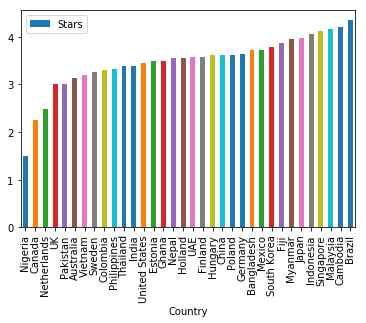

In [11]:
# =========== YOUR CODE HERE ======== 
df['Stars'] = pd.to_numeric(df['Stars']) # cast the ratings to numeric numbers from strings 
avg = df.groupby(['Country'])['Stars'].mean()
avg = avg.reset_index() # resets the column names to the origin ones 
avg = avg.sort_values('Stars')
avg.plot.bar(x='Country', y='Stars')

### <span style="background-color: #F9F2EB"> Choice of graph type: ... </span>

**2)** Now that you have figured out countries' rankings, which country should Bobby visit to get the BEST ramens? 

In [12]:
# =========== YOUR CODE HERE ========
print(avg.tail(1))

  Country  Stars
2  Brazil   4.35


**3)** Alright alright alright. There are over 2500 entries in this dataset. Bobby's old cellphone keeps lagging, every time he loads it. Help him extract the relevant data entries (the one from the best country) so he can navigate better. Oh while you're at it, rank the ramen in this country in ascending order according to their rankings! <br>
[hint: never overwrite your original dataset because you never know when you'll need it again.]

In [13]:
# =========== YOUR CODE HERE ========
brazil = df[df['Country'] == 'Brazil']
print(brazil)

     Review #   Brand                                       Variety Style  \
376      2204  Nissin             Cup Noodles Sabor Galinha Caipira   Cup   
436      2144  Nissin                           Lamen Sabor Picanha  Pack   
473      2107  Nissin  Lamen Sabor Frango Assado Com Toque De Limao  Pack   
540      2040  Nissin        Cup Noodles Sabor Franhp Com Requeijao   Cup   
607      1973  Nissin                   Cup Noodles Sabor Calabresa  Pack   

    Country  Stars Top Ten  
376  Brazil   4.00      no  
436  Brazil   4.00      no  
473  Brazil   4.50      no  
540  Brazil   5.00      no  
607  Brazil   4.25      no  


**4)** As personal preference, Bobby likes 'Pack' ramen. Therefore, he decides to start off with highest rated Pack ramen. Which one would it be? 

In [14]:
# =========== YOUR CODE HERE ========
brazil_packs = brazil[(brazil['Style'] == 'Pack')]
to_try = brazil_packs.loc[brazil_packs['Stars'].idxmax()]
print(to_try['Brand'], to_try['Variety'])

Nissin Lamen Sabor Frango Assado Com Toque De Limao


**5)** Bobby finishes his critique and shows it to his boss. Unfortunately, his boss was not impressed! They said that the brand was too mainstream, and too many critiques have already wrote articles about it. They told Bobby to target the ramen with a 5 star rating that is from either Japan, Malaysia, Singapore or South Korea. AND that have ranked 'Top Ten'. What are the possible ramens? 

Can you do this in one single line? 

In [15]:
# =========== YOUR CODE HERE ========
countries = ['Japan', 'Malaysia', 'South Korea', 'Singapore']
print(df[(df['Country'].isin(countries)) & (df['Top Ten'] != 'no')])

      Review #            Brand  \
633       1947      Prima Taste   
655       1925            Prima   
673       1907      Prima Taste   
963       1617          MyKuali   
995       1585           CarJEN   
1059      1521         Maruchan   
1072      1508            Mamee   
1080      1500          MyKuali   
1230      1350            Mamee   
1250      1330  Sapporo Ichiban   
1272      1308         Nongshim   
1309      1271      Prima Taste   
1382      1198    Samyang Foods   
1397      1183            Paldo   
1493      1087          MyKuali   
1588       992      Prima Taste   
1589       991      Prima Taste   
1757       823            Paldo   
1972       608             Koka   
2002       578         Nongshim   
2188       392           Nissin   
2189       391            Myojo   
2549        31            Myojo   
2567        13  Sapporo Ichiban   

                                               Variety Style      Country  \
633                 Singapore Laksa Wholegrain 

**6)** Bobby starts his ramen eating journey, and arrives to Singapore. In a single day finishes ALL the ramens above 3.0 (inclusive) stars, that are NOT in a 'Pack'. (Yes, he eats a lot). Change all of the 'Tries' entries of these rows to True. 

In [16]:
# =========== YOUR CODE HERE ========
mask = (df['Country'] == 'Singapore') & (df['Stars'] >= 3.0) & (df['Style'] != 'Pack')
df.loc[mask, 'Tried'] = True
print(df[df['Country'] == 'Singapore']) 

      Review #        Brand  \
9         2571         KOKA   
15        2565         KOKA   
22        2558         KOKA   
29        2551         KOKA   
35        2545         KOKA   
37        2543         KOKA   
43        2537       Nissin   
52        2528        Prima   
56        2524       Nissin   
59        2521       Nissin   
60        2520       Nissin   
74        2506         KOKA   
81        2499         KOKA   
111       2469         KOKA   
123       2457         KOKA   
124       2456         KOKA   
125       2455         KOKA   
126       2454         KOKA   
127       2453         KOKA   
128       2452         KOKA   
129       2451         KOKA   
130       2450         KOKA   
131       2449         KOKA   
132       2448         KOKA   
133       2447         KOKA   
134       2446         KOKA   
135       2445         KOKA   
136       2444         KOKA   
137       2443         KOKA   
176       2404      MyKuali   
...        ...          ...   
1138    

**7)** Bobby goes into the Singaporian 7-eleven and stumbles upon a new ramen that he has never heard of, and was not part of the dataset. He tried it and absolutely LOVED it (5/5). It was the packed 'Beef Noodle Soup' flavoured ramen from 'Prima Taste'. Help him add it into the dataset! 

In [17]:
# =========== YOUR CODE HERE ========
df = df.append(pd.Series([len(df) + 1, # Review #: Increment by 1 from the size of the dataset, 
           'Prima Taste', # Brand
           'Beef Noodle Soup', # Variety
           'Pack', # Style
           'Singapore', # Country
           5, # Stars
           'no', # Top Ten 
           True], index=df.columns), # Tried
           ignore_index=True) 

print(df[df['Variety'] == 'Beef Noodle Soup'])

      Review #        Brand           Variety Style    Country  Stars Top Ten  \
2580      2581  Prima Taste  Beef Noodle Soup  Pack  Singapore    5.0      no   

     Tried  
2580  True  


**8)** Once again, he notices that his phone is super slow. Therefore, he decides to delete each ramen he has tried from the list, instead of marking 'Tried' as True. This extra column makes the phone even slower. Help remove the 'Tried' column, and remove the colums where 'Tries' is True. Try to make this inplace so that. This will help Bobby save RAM, as it will not create a temporary duplicate dataset on his phone! 

In [18]:
# =========== YOUR CODE HERE ========
df.drop(df[df['Tried'] == True].index, inplace=True)
df.drop('Tried', axis=1, inplace=True)
print(df)

      Review #             Brand  \
0         2580         New Touch   
1         2579          Just Way   
2         2578            Nissin   
3         2577           Wei Lih   
4         2576    Ching's Secret   
5         2575     Samyang Foods   
6         2574           Acecook   
7         2573       Ikeda Shoku   
8         2572        Ripe'n'Dry   
9         2571              KOKA   
10        2570       Tao Kae Noi   
11        2569          Yamachan   
12        2568          Nongshim   
13        2567            Nissin   
14        2566            Nissin   
16        2564              TRDP   
17        2563          Yamachan   
18        2562          Binh Tay   
19        2561             Paldo   
20        2560            Nissin   
21        2559  Jackpot Teriyaki   
23        2557          Yamachan   
24        2556    Ching's Secret   
25        2555     Samyang Foods   
26        2554           Yum-Mie   
27        2553            Nissin   
28        2552           MyK

**9)** It suddenly hit Bobby. Why are there so many different styles of ramen? He is curious of the distribution of the packaging styles of the remaining to try ramens. Help him visualize the percentage of occurrence of each package. Explain the choice of your graph style. 

Pack    1531
Bowl     468
Cup      426
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64


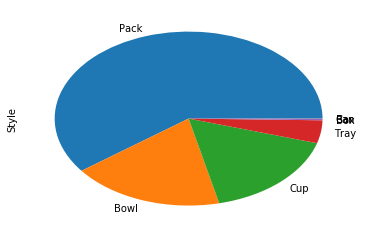

In [19]:
# =========== YOUR CODE HERE ========
style = df['Style'].value_counts()
print(style)
style.plot.pie()

### <span style="background-color: #F9F2EB"> Choice of graph type ... </span> 

**10)** After trying all the Singaporian ramen, he decides that it is time for him to change to a more powerful phone. He wants to save his UPDATED dataset to an external SD card so he can transfer it to his new phone. Save the dataset as 'Name-Surname-ramen-to-try.csv'. 

Don't forget to update the dataset first! Make sure that you save don't also save the row indeces! 

In [20]:
# =========== YOUR CODE HERE ======== 
df.drop(df[df['Country'] == 'Singapore'].index, inplace=True)
df.to_csv('./dataset/assignment-ramen-ratings.csv', index=False)

### Data Visualization 

###### 1) Load ./dataset/shiba-inu.jpg using OpenCV and display it. (make sure the colors are okay!) 

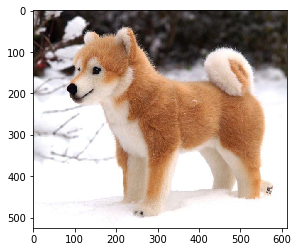

In [21]:
dog = plt.imread('./dataset/shiba-inu.jpg')

# =========== YOUR CODE HERE ======== 
plt.imshow(dog)
plt.show()

###### 2) Display the shiba-inu in (100, 120) size.

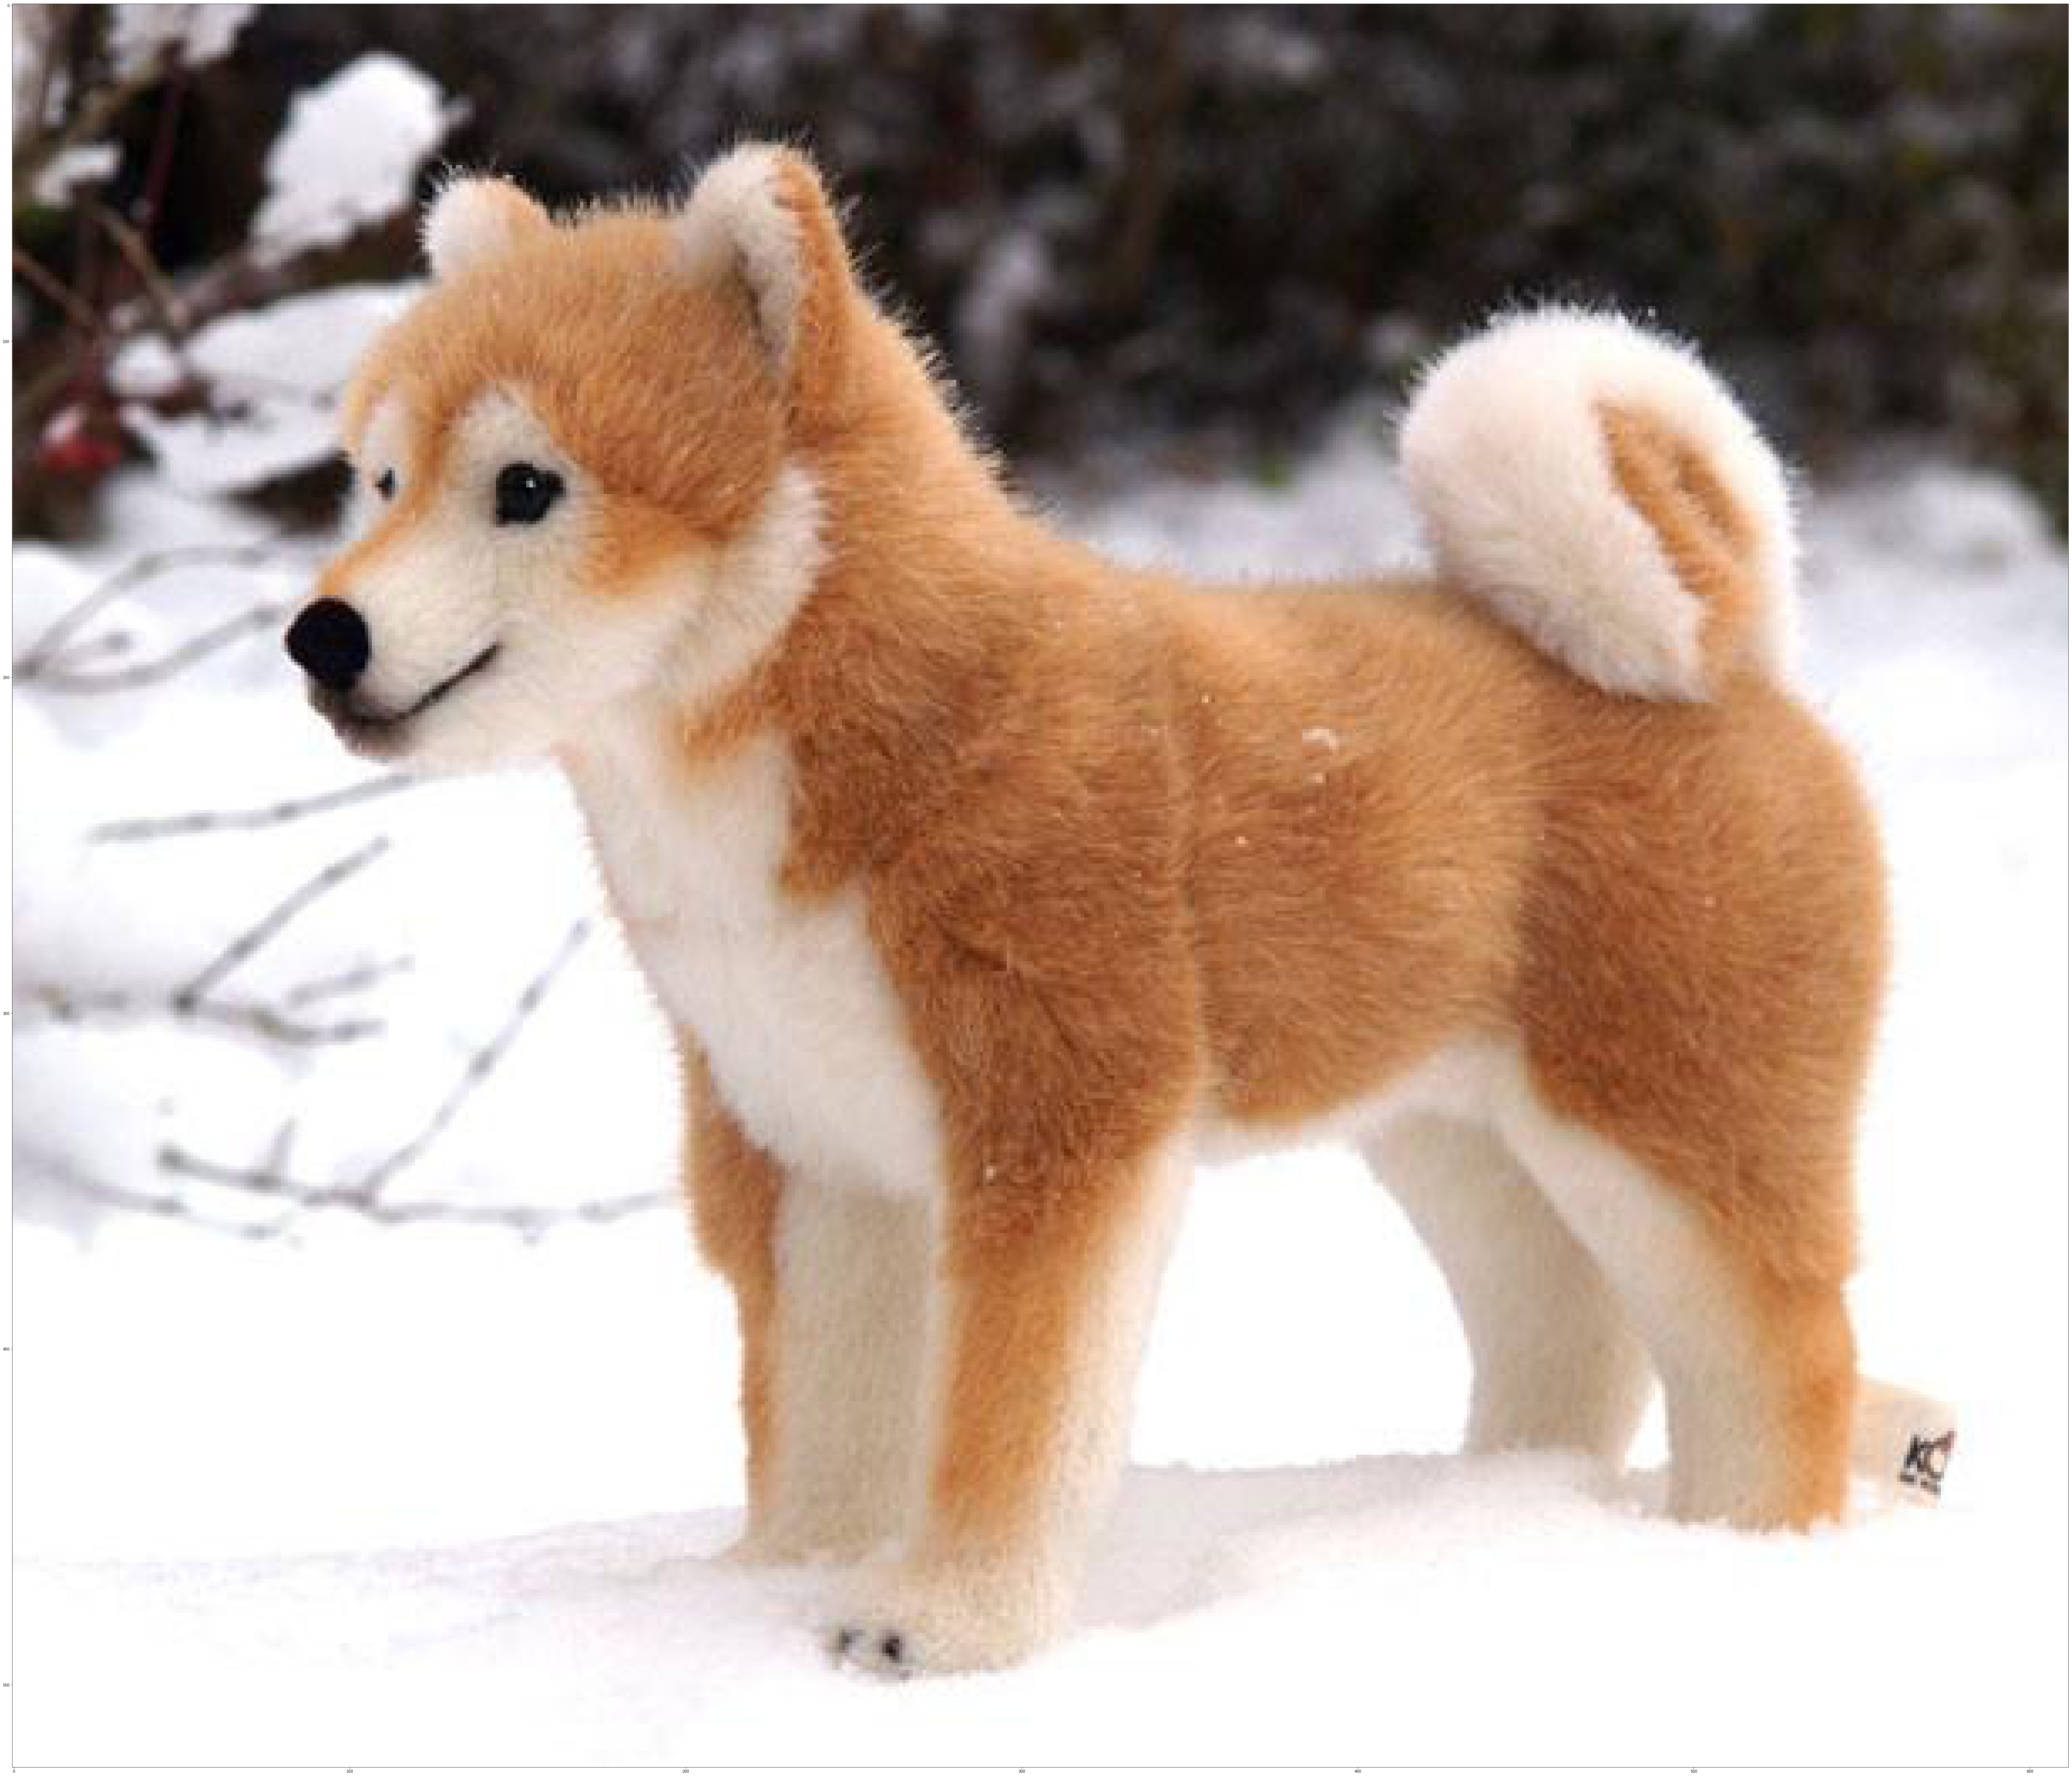

In [22]:
# =========== YOUR CODE HERE ======== 
plt.figure(figsize=(100, 120))
plt.imshow(dog)
plt.show()

###### 3) Load 'star-boo.jpg', 'baby-dog.jpg' and 'chihuahua.jpg' in the dataset folder using OpenCV and display all four images in a 2x2 grid. (make sure the colors are okay!)

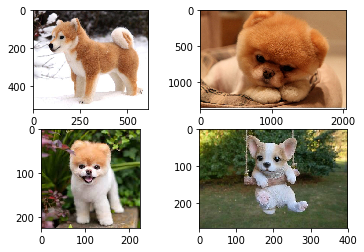

In [23]:
# =========== YOUR CODE HERE ======== 
baby_dog = plt.imread('./dataset/baby-dog.jpg')
star_boo = plt.imread('./dataset/star-boo.jpg')
chihuahua = plt.imread('./dataset/chihuahua.jpg')

# Create a subplot for each figure. 
plt.subplot(221) 
plt.imshow(dog)
plt.subplot(222)
plt.imshow(baby_dog)
plt.subplot(223)
plt.imshow(star_boo)
plt.subplot(224)
plt.imshow(chihuahua)

plt.show()

###### 4) Give the image a title of your choice. Remove the axis from the pictures and redisplay the pictures of the cute dogs. 

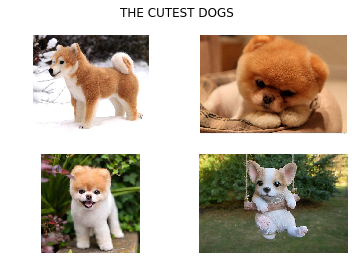

In [24]:
# =========== YOUR CODE HERE ======== 

plt.figure()

# title
plt.suptitle('THE CUTEST DOGS')

# photo grid
plt.subplot(221) 
plt.imshow(dog)
plt.axis('off') # remove axis

plt.subplot(222)
plt.imshow(baby_dog)
plt.axis('off') # remove axis

plt.subplot(223)
plt.imshow(star_boo)
plt.axis('off') # remove axis

plt.subplot(224)
plt.axis('off') # remove axis
plt.imshow(chihuahua)

plt.show()

## HAVE FUN!!